In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import sys
sys.path.append("../")

from kramersmoyal.kmc import kmc_kernel_estimator
from kramersmoyal.kernels_2 import epanechnikov, gaussian

## KMC

### 1d

Here is a simple Euler-Maruyama integrator to generate an Ornstein--Uhlenbeck process according to

$$\mathrm{d}y(t) = -\theta y(t)\mathrm{d}t + \sigma \mathrm{d}W(t) $$

In [160]:
theta=.5                             #Drift
sigma=.25
t_start=0
t_final=25                                   #10^7 = 10000
delta_t=0.001

time=np.linspace(t_start,t_final,t_final*int(1/delta_t))

In [161]:
# Initialise the array y
y = np.zeros([time.size])
#Generate a Wiener process
dw = np.random.normal(loc=0, scale=np.sqrt(delta_t),size=[time.size,1])

# Give some random initial conditions far from zero
y[0]=np.random.normal(size=1)/100 + 2.3

# Integrate the process
for i in range(1,time.size):
    y[i] = y[i-1] - theta*y[i-1]*delta_t + sigma*dw[i]

Text(0,0.5,'$y$')

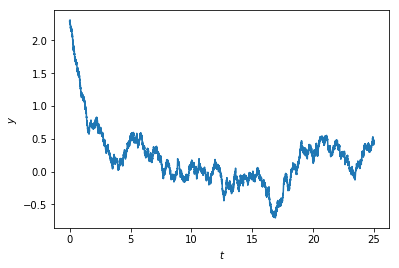

In [163]:
plt.plot(time,y)
plt.xlabel('$t$'); plt.ylabel('$y$')

In [157]:
timeseries = y

In [164]:
#timeseries = np.random.normal(loc=0.0, scale=1,size=[10_000_00,1])
# timeseries = 5 * (np.random.rand(1_000_000, 1) - 0.5)

bins = np.array([200])

# powers = np.array([[0]])
powers = np.array([[0,1,2,3,4,5,6]])

kmc, edges = kmc_kernel_estimator(
    timeseries, kernel=epanechnikov, bw=.1, bins=bins, powers=powers)

ValueError: object of too small depth for desired array

In [120]:
%matplotlib inline

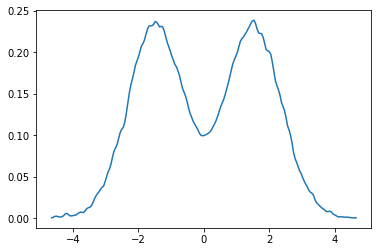

In [126]:
X, = np.meshgrid(*edges)

plt.plot(X, kmc[...,4])

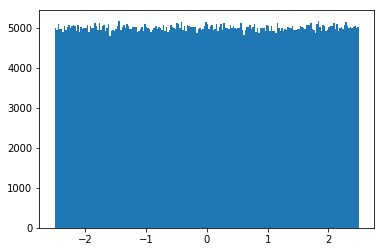

In [77]:
plt.hist(timeseries,bins=200);

### 2d

In [114]:
# timeseries = np.random.normal(loc=0, scale=1,size=[10_000_000,2])
timeseries = 5 * (np.random.rand(1_000_000, 2) - 0.5)

bins = np.array([400,400])

# powers = np.array([[0],[0]])
powers = np.array([[0,1,0,1,2,0,2,4,0,4,6,0,6,8,0], [0,0,1,1,0,2,2,0,4,4,0,6,6,0,8]])

kmc, edges = kmc_kernel_estimator(
    timeseries, kernel=epanechnikov, bw=0.3, bins=bins, powers=powers)

/home/leo/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [115]:
%matplotlib inline

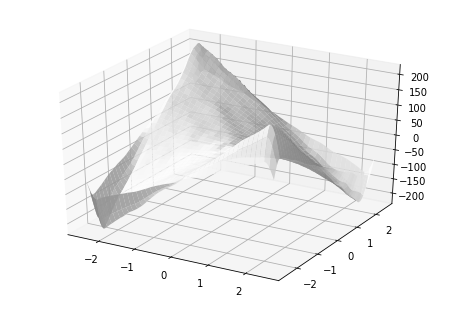

In [116]:
fig = plt.figure()
ax = Axes3D(fig)

X, Y = np.meshgrid(*edges)

ax.plot_surface(X, Y, kmc[...,3].T,
                alpha=0.85, rstride=10, cstride=10, linewidth=2, 
                antialiased=True, color='white', zorder = .1)